# Machine Learning (CS535): Assignment 2
## Linear and Logistic Regression
#### Name: 
#### Roll Number:

### Instructions


*   The aim of this assignment is to implement linear and logistic regression from scratch.
*   You must use the Python programming language.
*   You can add as many code/markdown cells as required.
*   ALL cells must be run (and outputs visible) in order to get credit for your work.
*   Please use procedural programming style and comment your code thoroughly.
*   There are two parts of this assignment. In part 1, you can use **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and any other standard Python libraries. You are $\color{red}{\text{not allowed}}$ to use **scikit-learn**, or any other machine learning toolkit. You can only use **scikit-learn** in part 2.
*   **Carefully read the submission instructions and plagiarism policy.**
*   Deadline to submit this assignment is 7th November 2022, 11:55pm on LMS.

### Submission Instructions

You should submit both your notebook file (.ipynb) and python script (.py) on LMS.
Please name your files Name_RollNo_Assignment2. Zip these files in a folder and name
the folder Name_RollNo_Assignment2. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**


### Introduction
In this assignment, you will be implementing linerar regression and logistic regression models for the provided datasets from scratch. A description of the problem statement is given at the start of each part. 

Try to write modeular code as some of the functions you write for task 1 may be usable in task 2.

Have fun!

## Task 1: Multivariate Linear Regression

In this part, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately. 

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

### Part A: Implementation from scratch

Use the slides and textbook as a reference to write the gradient descent algorithm from scratch for this problem.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [51]:
# inline matplotlib plots
%matplotlib inline

In [52]:
# load the dataset
print("Loading data...")

data_train_X = pd.read_csv('Dataset/Task1/trainData.txt', sep=" ", header=None)
data_train_y = pd.read_csv('Dataset/Task1/trainLabels.txt', sep=" ", header=None)
data_test_X = pd.read_csv('Dataset/Task1/testData.txt', sep=" ", header=None)
data_test_y = pd.read_csv('Dataset/Task1/testLabels.txt', sep=" ", header=None)

train_X = data_train_X.to_numpy().astype(np.float64)
train_y = data_train_y.to_numpy().astype(np.float64)
test_X = data_test_X.to_numpy().astype(np.float64)
test_y = data_test_y.to_numpy().astype(np.float64)

# print the shapes of the data
print("train_X shape: ", train_X.shape)
print("train_y shape: ", train_y.shape)
print("test_X shape: ", test_X.shape)
print("test_y shape: ", test_y.shape)

Loading data...
train_X shape:  (404, 13)
train_y shape:  (404, 1)
test_X shape:  (102, 13)
test_y shape:  (102, 1)


In [53]:
# adding names of the columns to the dataframe

data_train_X.columns = ['Crime rate', 'Residential land zone', 'Business acres', 'Charles River', 'Nitric oxide concentration', 'Number of rooms', 'Age of buildings', 'Distance to employment centres', 'Highway accessibility', 'Property tax rate', 'Pupil-teacher ratio', 'Black population', 'Lower status of population']
data_train_y.columns = ['Median value of owner-occupied homes']

data_test_X.columns = ['Crime rate', 'Residential land zone', 'Business acres', 'Charles River', 'Nitric oxide concentration', 'Number of rooms', 'Age of buildings', 'Distance to employment centres', 'Highway accessibility', 'Property tax rate', 'Pupil-teacher ratio', 'Black population', 'Lower status of population']
data_test_y.columns = ['Median value of owner-occupied homes']

In [54]:

# print the first 5 rows of the data
print("train_X data:")
print(data_train_X.head())

train_X data:
   Crime rate  Residential land zone  Business acres  Charles River  \
0     0.17134                    0.0           10.01            0.0   
1     0.28960                    0.0            9.69            0.0   
2     0.06588                    0.0            2.46            0.0   
3     0.08707                    0.0           12.83            0.0   
4     1.25179                    0.0            8.14            0.0   

   Nitric oxide concentration  Number of rooms  Age of buildings  \
0                       0.547            5.928              88.2   
1                       0.585            5.390              72.9   
2                       0.488            7.765              83.3   
3                       0.437            6.140              45.8   
4                       0.538            5.570              98.1   

   Distance to employment centres  Highway accessibility  Property tax rate  \
0                          2.4631                    6.0              4

In [55]:
# concatenate the train_X and train_y dataframes
data_train = pd.concat([data_train_X, data_train_y], axis=1)

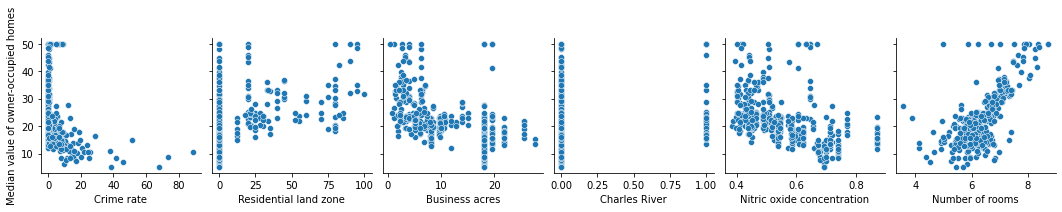

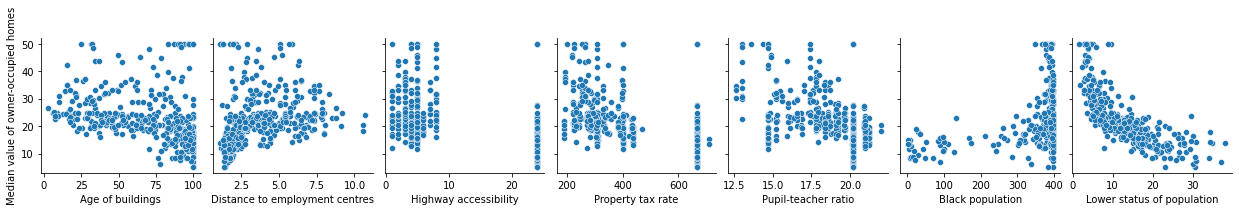

In [19]:
# Plot the data
sns.pairplot(data_train, x_vars=['Crime rate', 'Residential land zone', 'Business acres', 'Charles River', 'Nitric oxide concentration', 'Number of rooms'], y_vars='Median value of owner-occupied homes')
sns.pairplot(data_train, x_vars=['Age of buildings', 'Distance to employment centres', 'Highway accessibility', 'Property tax rate', 'Pupil-teacher ratio', 'Black population', 'Lower status of population'], y_vars='Median value of owner-occupied homes')

In [74]:
# Multivariate linear regression class. Bias is kept separate
class LinearRegression:
    def __init__(self, X, y, learning_rate=0.05, epochs=1000):
        
        self.X = X
        self.y = y

        self.m = X.shape[0]
        self.n = X.shape[1]

        self.learning_rate = learning_rate
        self.epochs = epochs

        self.weights = np.zeros((X.shape[1], 1))
        self.bias = np.zeros((1, 1))
        self.losses = []

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def calculateCost(self, y, y_pred):
        cost = np.mean((y - y_pred) ** 2) / 2
        return cost

    def R2score(self, y_pred, y):
        return 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
    
    def get_weights(self):
        return self.weights
    
    def get_bias(self):
        return self.bias

    def fit(self):
        for i in range(1, self.epochs+1):
            if i % 1000 == 0:
                print("Epoch: ", i)
            
            y_pred = self.predict(self.X)
            cost = self.calculateCost(self.y, y_pred)
            self.losses.append(cost)
            dw = np.dot(self.X.T, (y_pred - self.y)) / self.m
            db = np.sum(y_pred - self.y) / self.m
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Print final loss
        print("Final cost: ", cost)

    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.show()

In [72]:
# Normalize the training data
train_X = (train_X - np.mean(train_X, axis=0)) / np.std(train_X, axis=0)

# Normalize the test data
test_X = (test_X - np.mean(test_X, axis=0)) / np.std(test_X, axis=0)

In [79]:
# Run the linear regression model on data.
model = LinearRegression(train_X, train_y, learning_rate=0.05, epochs=2000)
model.fit()

# Print R2 score for training data
y_pred = model.predict(train_X)
print("R2 score for training data: ", model.R2score(y_pred, train_y))

Epoch:  1000
Epoch:  2000
Final cost:  11.002403064516942
R2 score for training data:  0.73996430736934


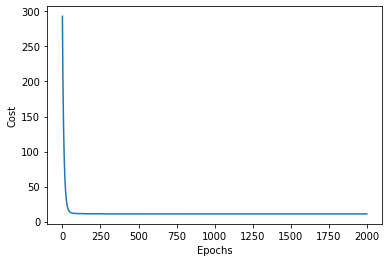

In [76]:
# Plot the loss curve
model.plot_loss()

In [78]:
# Running the model on test data
y_pred = model.predict(test_X)
loss = model.calculateCost(test_y, y_pred)

# Print the loss
print("Test loss: ", loss)

# Print the R2 score
print("R2 score: ", model.R2score(y_pred, test_y))

Test loss:  10.490642060854762
R2 score:  0.7479539390022436


### Part B: Regularized Linear Regression Using Scikit-learn


Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [27]:
# Use scikit-learn to run the linear regression model on data.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(train_X, train_y)

# Mean squared error on training data
print("Mean squared error on training data: ", mean_squared_error(train_y, linear_reg.predict(train_X)))

# Make predictions using the testing set
y_pred = linear_reg.predict(test_X)

# The mean squared error on test data
print('Mean squared error on test data: ', mean_squared_error(test_y, y_pred))

Mean squared error on training data:  22.004800838348142
Mean squared error on test data:  20.982945190702573


In [87]:
# Compare scikit-learn's Ridge, Lasso and ElasticNet regression models using different values of alpha
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Create a list of alphas
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create a list of models
models = [Ridge(), Lasso(), ElasticNet()]

# Create a dicttionary with model name as key and list of MSEs as value
model_mse = {model.__class__.__name__: [] for model in models}

# Print the Mean squared error and R2 score for each model
for model in models:
    # Print name of the model
    model_name = model.__class__.__name__
    print("Model: ", model_name)
    for alpha in alphas:
        model.set_params(alpha=alpha)
        model.fit(train_X, train_y)
        y_pred = model.predict(test_X)
        mse = mean_squared_error(test_y, y_pred)
        print("Mean squared error for alpha = ", alpha, ": ", mse)
        model_mse[model_name].append(mse)

Model:  Ridge
Mean squared error for alpha =  0.001 :  20.98285749110816
Mean squared error for alpha =  0.01 :  20.982068568518944
Mean squared error for alpha =  0.1 :  20.97421616188063
Mean squared error for alpha =  1 :  20.89920040025166
Mean squared error for alpha =  10 :  20.38665678748075
Mean squared error for alpha =  100 :  20.30387534988629
Mean squared error for alpha =  1000 :  36.56503499613019
Model:  Lasso
Mean squared error for alpha =  0.001 :  20.967985873104887
Mean squared error for alpha =  0.01 :  20.830893331928216
Mean squared error for alpha =  0.1 :  20.15955164250332
Mean squared error for alpha =  1 :  22.904857281037316
Mean squared error for alpha =  10 :  83.71085929676252
Mean squared error for alpha =  100 :  83.71085929676252
Mean squared error for alpha =  1000 :  83.71085929676252
Model:  ElasticNet
Mean squared error for alpha =  0.001 :  20.958006000842534
Mean squared error for alpha =  0.01 :  20.751529001649214
Mean squared error for alpha =

## Task 2: Logistic Regression

#### Problem:
The purpose of this assignment is to get you familiar with sentiment classification. By the end of this assignment you will have your very own “Sentiment Analyzer”. You are given with Large Movie Review Dataset that contains separate labelled train and test set. Your task is to train a Logistic Regression classifier on train set and report accuracy on test set.

#### Dataset:
The core dataset contains 50,000 reviews split evenly into 25k train and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg). There are two top-level directories [train/, test/] corresponding to the training and test sets. Each contains [pos/, neg/] directories for the reviews with binary labels positive and negative. Within these directories, reviews are stored in text files named following the convention [[id]_[rating].txt] where [id] is a unique id and [rating] is the star rating for that review on a 1-10 scale. For example, the file [test/pos/200_8.txt] is the text for a positive-labeled test set example with unique id 200 and star rating 8/10 from IMDb.

#### Preprocessing:
In the preprocessing step you’re required to remove the stop words and punctuation marks and other unwanted characters from the reviews and convert them to lower case. You may find the string and regex module useful for this purpose. A stop word list is provided with the assignment statement.

#### Feature Extraction:
In the feature extraction step you can you’ll represent each review by the 3 features 𝑥0, 𝑥1, 𝑥2 and 1 class label 𝑦 as shown in the table below:

| Feature | Definition | Comment |
| --- | --- | --- |
| x_0 | count(positive words) ∈ review | Positive lexicon is provided |
| --- | --- | --- |
| x_2 | count(negative words) ∈ review | Negative lexicon is provided |
| --- | --- | --- |
| y | 1 if positive, 0 otherwise | Mentioned in directory name |


### Part A: Implementation from scratch

#### Guidelines:
Implement the following in order to complete this part:
* Sigmoid function
* Cross-entropy loss function
* Batch Gradient Descent
* Prediction function that predict whether the label is 0 or 1 for test reviews using learned logistic regression (use the decision threshold of 0.5)
* Evaluation function that calculates classification accuracy and confusion matrix on test set (the expected accuracy on the test set is around 72%)
* Report plots with no. of iterations/ epochs on x-axis and training/ validation loss on y-axis.

### Part B: Use Scikit-learn

In this part, use scikit-learn’s [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation to train and test the logistic regression on the provided dataset. Use scikit-learn’s accuracy_score function to calculate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix on test set.